In [1]:
%pylab inline
import emeraldtriangles
import numpy as np
import pandas as pd
import triangle
import scipy.spatial


Populating the interactive namespace from numpy and matplotlib


# Example data

Data from [Matplotlib demos](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/tripcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-tripcolor-demo-py)

In [2]:
from example_data import xy, triangles, newpoints

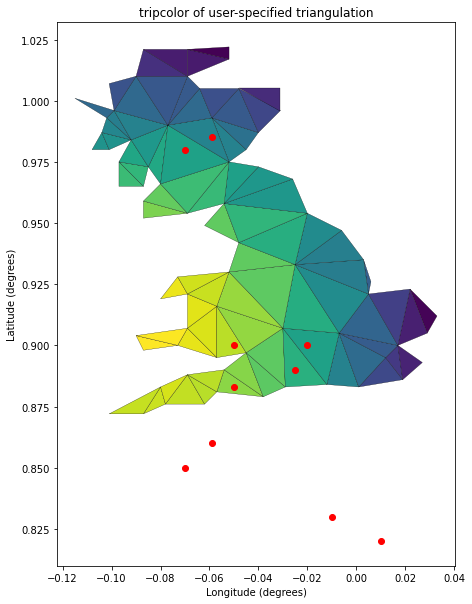

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
tpc = ax.tripcolor(xy["X"], xy["Y"], triangles[[0, 1, 2]], facecolors=triangles["color"], edgecolors='k')
ax.set_title('tripcolor of user-specified triangulation')
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')

plt.scatter(newpoints["X"], newpoints["Y"], c="red")

plt.show()

# Point-in-triangle test

Like point-in-polygon, but fast across a large number of triangles

In [4]:
points_and_triangles = emeraldtriangles.points_in_triangles(newpoints, xy, triangles)
points_and_triangles

,point,triangle
0,0,4
1,1,16
2,2,20
3,3,17
4,4,57
5,5,60
6,6,-1
7,7,-1
8,8,-1
9,9,-1


# Adding points to a mesh

Split triangles in a mesh to add new nodes to the mesh

In [5]:
xyp, trianglesp, leftover = emeraldtriangles.replace_triangle_faces(newpoints, xy, triangles)

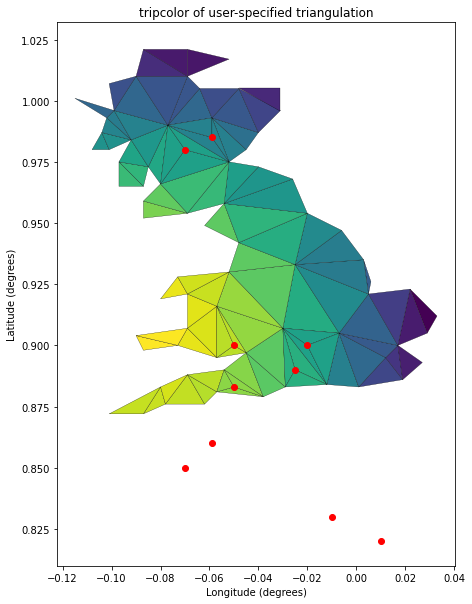

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
tpc = ax.tripcolor(xyp["X"], xyp["Y"], trianglesp[[0,1,2]], facecolors=trianglesp["color"], edgecolors='k')
ax.set_title('tripcolor of user-specified triangulation')
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')

plt.scatter(newpoints["X"], newpoints["Y"], c="red")

plt.show()

# Mesh boundary polygon

Calculate the boundary edges of a mesh, as well as transform those edges into a polygon.

In [7]:
border_sides = emeraldtriangles.mesh_boundary(triangles)
boundaries = emeraldtriangles.mesh_boundary_to_pointlists(border_sides)

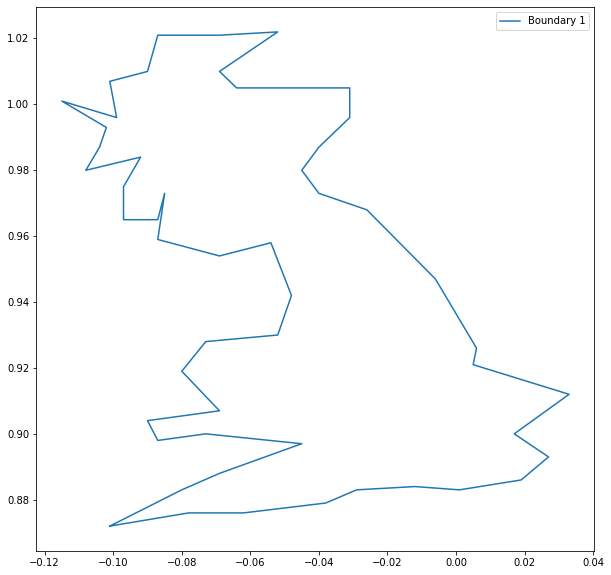

In [8]:
fig = plt.figure(figsize=(10,10))
for idx, boundary in boundaries.items():
    boundary = xy.loc[boundary]
    plt.plot(boundary["X"], boundary["Y"], label="Boundary %s" % idx)
plt.legend()
plt.show()

In [9]:
# emeraldtriangles.append_nodes(points, triangle_nodes, triangle_faces)

In [16]:
tri = emeraldtriangles.supplant_triangle_faces(xyp, trianglesp)

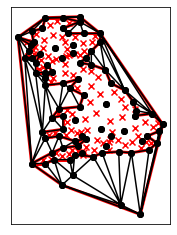

In [25]:
triangle.plot(plt.gca(), **tri)
plt.show()

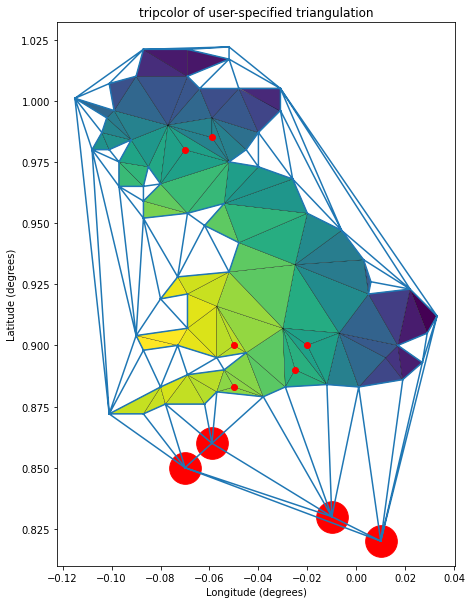

In [26]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')

tpc = ax.tripcolor(xyp["X"], xyp["Y"], trianglesp[[0,1,2]], facecolors=trianglesp["color"], edgecolors='k')

tpc = ax.triplot(tri["vertices"][:,0], tri["vertices"][:,1], tri["triangles"])

holes = xyp.loc[leftover]

plt.scatter(newpoints["X"], newpoints["Y"], c="red")

plt.scatter(holes["X"], holes["Y"], c="red", s=1000)

ax.set_title('tripcolor of user-specified triangulation')
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')

plt.show()